In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:
dataset_path = "C:\\Users\\SAKET\\OneDrive\\Desktop\\AIML\\DL-Models\\Flood Detection\\Flood_dataset"  

image_path = os.path.join(dataset_path, "Image")
mask_path = os.path.join(dataset_path, "Mask")
metadata_path = os.path.join(dataset_path, "metadata.csv")


In [4]:
df = pd.read_csv(metadata_path)
df.head()


,Image,Mask
0,0.jpg,0.png
1,1.jpg,1.png
2,2.jpg,2.png
3,3.jpg,3.png
4,4.jpg,4.png


In [6]:
# Function to display an image and its corresponding mask
def visualize_image_mask(index):
    img_name = df.iloc[index, 0]  # First column contains image filenames
    mask_name = df.iloc[index, 1]  # Second column contains mask filenames

    img_path = os.path.join(image_path, img_name)
    mask_path_full = os.path.join(mask_path, mask_name)

    # Debugging: Print paths to check if they are correct
    print(f"Image path: {img_path}")
    print(f"Mask path: {mask_path_full}")

    # Load image
    img = cv2.imread(img_path)
    
    # Check if the image was loaded correctly
    if img is None:
        print(f"Error: Could not load image at {img_path}")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Load mask
    mask = cv2.imread(mask_path_full, cv2.IMREAD_GRAYSCALE)
    
    if mask is None:
        print(f"Error: Could not load mask at {mask_path_full}")
        return

    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Flood Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Segmentation Mask")
    plt.axis("off")

    plt.show()

# Try displaying a sample image
visualize_image_mask(0)


Image path: C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Image\0.jpg
Mask path: C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Mask\0.png
Error: Could not load image at C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Image\0.jpg


In [7]:
import cv2
from PIL import Image
import os

def check_image_loading(image_path):
    print(f"Checking: {image_path}")

    # Check with OpenCV
    img_cv = cv2.imread(image_path)
    if img_cv is None:
        print("⚠️ OpenCV cannot read the image!")

    # Check with PIL
    try:
        img_pil = Image.open(image_path)
        print("✅ PIL successfully loaded the image!")
        img_pil.show()  # Opens the image
    except Exception as e:
        print(f"⚠️ PIL error: {e}")

img_path = r"C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Image\0.jpg"
check_image_loading(img_path)


Checking: C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Image\0.jpg
⚠️ OpenCV cannot read the image!
✅ PIL successfully loaded the image!


In [8]:
from PIL import Image

# Define the image path
img_path = r"C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Image\0.jpg"

# Open the image with PIL
img = Image.open(img_path)

# Convert the image to standard RGB format
img = img.convert("RGB")

# Save the image again as a proper JPEG
img.save(img_path, format="JPEG")

print("✅ Image successfully converted and saved!")


✅ Image successfully converted and saved!


In [9]:
import cv2

img_path = r"C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Image\0.jpg"

# Try loading the image again
img = cv2.imread(img_path)
if img is None:
    print("⚠️ OpenCV STILL cannot read the image! Try moving the dataset out of OneDrive.")
else:
    print("✅ OpenCV successfully loaded the image!")


✅ OpenCV successfully loaded the image!


In [10]:
import os
from PIL import Image

image_folder = r"C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Image"

for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)
    try:
        img = Image.open(img_path)
        img = img.convert("RGB")
        img.save(img_path, format="JPEG")  # Overwrite in JPEG format
        print(f"✅ Fixed: {filename}")
    except Exception as e:
        print(f"⚠️ Could not fix {filename}: {e}")


✅ Fixed: 0.jpg
✅ Fixed: 1.jpg
✅ Fixed: 10.jpg
✅ Fixed: 1000.jpg
✅ Fixed: 1001.jpg
✅ Fixed: 1002.jpg
✅ Fixed: 1003.jpg
✅ Fixed: 1004.jpg
✅ Fixed: 1005.jpg
✅ Fixed: 1006.jpg
✅ Fixed: 1007.jpg
✅ Fixed: 1008.jpg
✅ Fixed: 1009.jpg
✅ Fixed: 1010.jpg
✅ Fixed: 1011.jpg
✅ Fixed: 1012.jpg
✅ Fixed: 1013.jpg
✅ Fixed: 1014.jpg
✅ Fixed: 1015.jpg
✅ Fixed: 1016.jpg
✅ Fixed: 1017.jpg
✅ Fixed: 1018.jpg
✅ Fixed: 1019.jpg
✅ Fixed: 1020.jpg
✅ Fixed: 1021.jpg
✅ Fixed: 1022.jpg
✅ Fixed: 1023.jpg
✅ Fixed: 1024.jpg
✅ Fixed: 1025.jpg
✅ Fixed: 1026.jpg
✅ Fixed: 1027.jpg
✅ Fixed: 1028.jpg
✅ Fixed: 1029.jpg
✅ Fixed: 1030.jpg
✅ Fixed: 1031.jpg
✅ Fixed: 1032.jpg
✅ Fixed: 1033.jpg
✅ Fixed: 1034.jpg
✅ Fixed: 1035.jpg
✅ Fixed: 1036.jpg
✅ Fixed: 1037.jpg
✅ Fixed: 1038.jpg
✅ Fixed: 1039.jpg
✅ Fixed: 1040.jpg
✅ Fixed: 1041.jpg
✅ Fixed: 1042.jpg
✅ Fixed: 1043.jpg
✅ Fixed: 1044.jpg
✅ Fixed: 1045.jpg
✅ Fixed: 1046.jpg
✅ Fixed: 1047.jpg
✅ Fixed: 1048.jpg
✅ Fixed: 1049.jpg
✅ Fixed: 1050.jpg
✅ Fixed: 1051.jpg
✅ Fixed: 1052.jpg


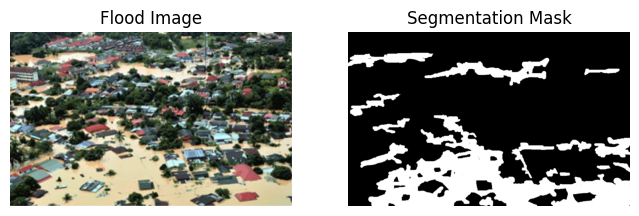

In [11]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset paths
image_path = r"C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Image"
mask_path = r"C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\Mask"

# Load the metadata CSV
csv_path = r"C:\Users\SAKET\OneDrive\Desktop\AIML\DL-Models\Flood Detection\Flood_dataset\metadata.csv"
df = pd.read_csv(csv_path)

# Function to visualize an image and its mask
def visualize_image_mask(index):
    img_name = df.iloc[index, 0]  # First column contains image filenames
    mask_name = df.iloc[index, 1]  # Second column contains mask filenames

    img = cv2.imread(os.path.join(image_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    mask = cv2.imread(os.path.join(mask_path, mask_name), cv2.IMREAD_GRAYSCALE)  # Load mask in grayscale

    # Display both side by side
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Flood Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Segmentation Mask")
    plt.axis("off")

    plt.show()

# Test by visualizing the first image-mask pair
visualize_image_mask(0)


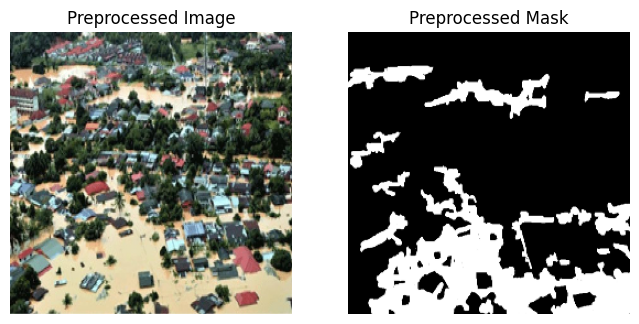

In [12]:
import numpy as np
import tensorflow as tf

# Define image dimensions (adjust if needed)
IMG_HEIGHT = 256
IMG_WIDTH = 256

def preprocess_image(image_path, mask_path):
    # Load and resize the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize
    img = img / 255.0  # Normalize to [0, 1]

    # Load and resize the mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))  # Resize
    mask = mask / 255.0  # Normalize to [0, 1]
    mask = np.expand_dims(mask, axis=-1)  # Add channel dimension

    return img, mask

# Test with a sample image
sample_image_path = os.path.join(image_path, df.iloc[0, 0])
sample_mask_path = os.path.join(mask_path, df.iloc[0, 1])

sample_img, sample_mask = preprocess_image(sample_image_path, sample_mask_path)

# Display preprocessed image & mask
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_img)
plt.title("Preprocessed Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sample_mask.squeeze(), cmap="gray")
plt.title("Preprocessed Mask")
plt.axis("off")

plt.show()


In [14]:
from PIL import Image

def preprocess_image(image_path, mask_path):
    # Load image with OpenCV
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize
    img = img / 255.0  # Normalize to [0, 1]

    # Load mask with PIL (since OpenCV sometimes fails)
    mask = Image.open(mask_path).convert("L")  # Convert to grayscale
    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT))  # Resize
    mask = np.array(mask) / 255.0  # Convert to NumPy and normalize
    mask = np.expand_dims(mask, axis=-1)  # Add channel dimension

    return img, mask


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
import os

# Constants
IMG_WIDTH = 256
IMG_HEIGHT = 256

# Paths
image_dir = "C:\\Users\\SAKET\\OneDrive\\Desktop\\AIML\\DL-Models\\Flood Detection\\Flood_dataset\\Image"
mask_dir = "C:\\Users\\SAKET\\OneDrive\\Desktop\\AIML\\DL-Models\\Flood Detection\\Flood_dataset\\Mask"

# Read the metadata CSV file
import pandas as pd
df = pd.read_csv("C:\\Users\\SAKET\\OneDrive\\Desktop\\AIML\\DL-Models\\Flood Detection\\Flood_dataset\\metadata.csv")

# Lists to store images and masks
images = []
masks = []

# Load all images and masks
for i in range(len(df)):
    img_path = os.path.join(image_dir, df.iloc[i, 0])  # Image filename
    mask_path = os.path.join(mask_dir, df.iloc[i, 1])  # Mask filename

    # Load image
    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))
    img = np.array(img) / 255.0  # Normalize to [0, 1]

    # Load mask
    mask = Image.open(mask_path).convert("L")  # Convert to grayscale
    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT))
    mask = np.array(mask) / 255.0  # Normalize to [0, 1]
    mask = np.expand_dims(mask, axis=-1)  # Add channel dimension

    images.append(img)
    masks.append(mask)

# Convert to NumPy arrays
images = np.array(images)
masks = np.array(masks)

print(f"Dataset Loaded: {images.shape[0]} images, {masks.shape[0]} masks.")


Dataset Loaded: 290 images, 290 masks.


In [17]:
# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape[0]} images, Validation Data: {X_val.shape[0]} images")


Training Data: 232 images, Validation Data: 58 images


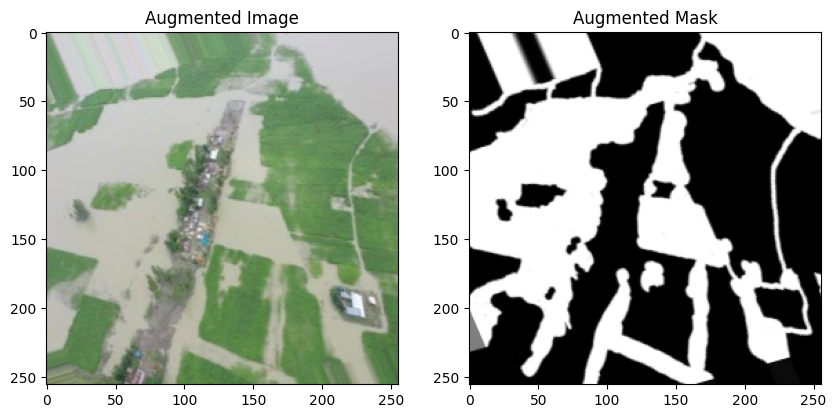

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation transformations
data_gen_args = dict(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Create ImageDataGenerator objects
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Generate augmented images and masks
image_generator = image_datagen.flow(X_train, batch_size=8, seed=42)
mask_generator = mask_datagen.flow(Y_train, batch_size=8, seed=42)

# Combine generators
train_generator = zip(image_generator, mask_generator)

# Check one augmented sample
import matplotlib.pyplot as plt

augmented_images, augmented_masks = next(train_generator)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(augmented_images[0])  
axes[0].set_title("Augmented Image")

axes[1].imshow(augmented_masks[0].squeeze(), cmap="gray")  
axes[1].set_title("Augmented Mask")

plt.show()


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input, Dropout
from tensorflow.keras.models import Model


In [20]:
def build_unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder (Downsampling)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder (Upsampling)
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model


In [21]:
# Initialize U-Net model
model = build_unet_model()

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 64)      │           1,792 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 64)      │          36,928 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 64)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 128)     │         147,584 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 128)       │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 256)       │         590,080 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 256)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 512)       │       2,359,808 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 16, 16, 512)       │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 16, 16, 1024)      │       4,719,616 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 16, 16, 1024)      │       9,438,208 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 32, 32, 512)       │       2,097,66

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


In [23]:
# Define loss function and optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss=BinaryCrossentropy(), metrics=['accuracy'])


In [24]:
# Define batch size and epochs
batch_size = 8
epochs = 25

# Train the model
history = model.fit(image_generator, 
                    steps_per_epoch=len(X_train) // batch_size, 
                    epochs=epochs, 
                    validation_data=mask_generator, 
                    validation_steps=len(Y_train) // batch_size)


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


C:\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


ValueError: None values not supported.

In [25]:
print(f"X_train shape: {np.shape(X_train)}")
print(f"Y_train shape: {np.shape(Y_train)}")

# Check if any None values exist
print("Any None in X_train?", any(x is None for x in X_train))
print("Any None in Y_train?", any(y is None for y in Y_train))


X_train shape: (232, 256, 256, 3)
Y_train shape: (232, 256, 256, 1)
Any None in X_train? False
Any None in Y_train? False


In [26]:
# Train the model
history = model.fit(image_generator, 
                    steps_per_epoch=max(1, len(X_train) // batch_size), 
                    epochs=epochs, 
                    validation_data=mask_generator, 
                    validation_steps=max(1, len(Y_train) // batch_size))


Epoch 1/25


ValueError: None values not supported.

In [27]:
print(f"X_train type: {type(X_train)}, shape: {np.shape(X_train)}")
print(f"Y_train type: {type(Y_train)}, shape: {np.shape(Y_train)}")

print("Any None in X_train?", any(x is None for x in X_train))
print("Any None in Y_train?", any(y is None for y in Y_train))


X_train type: <class 'numpy.ndarray'>, shape: (232, 256, 256, 3)
Y_train type: <class 'numpy.ndarray'>, shape: (232, 256, 256, 1)
Any None in X_train? False
Any None in Y_train? False


In [28]:
x_batch, y_batch = next(image_generator)
print(f"Image batch shape: {x_batch.shape}")
print(f"Mask batch shape: {y_batch.shape}")


ValueError: too many values to unpack (expected 2)

In [29]:
batch = next(image_generator)
print(type(batch))
print(len(batch))  # Should be 2 (images, masks)


<class 'numpy.ndarray'>
8


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Data augmentation parameters
data_gen_args = dict(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create separate generators for images and masks
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

batch_size = 8  # Ensure batch size is defined

# Ensure X_train and Y_train are provided correctly
image_generator = image_datagen.flow(X_train, Y_train, batch_size=batch_size, seed=42)

# Get a batch from the generator
x_batch, y_batch = next(image_generator)

# Verify the shapes
print(f"Image batch shape: {x_batch.shape}")  # Expected: (batch_size, 256, 256, 3)
print(f"Mask batch shape: {y_batch.shape}")  # Expected: (batch_size, 256, 256, 1)


Image batch shape: (8, 256, 256, 3)
Mask batch shape: (8, 256, 256, 1)


In [31]:
# Define training parameters
epochs = 25
batch_size = 8  # Ensure this matches the generator

# Train the model
history = model.fit(
    image_generator, 
    steps_per_epoch=max(1, len(X_train) // batch_size), 
    epochs=epochs, 
    validation_data=(X_val, Y_val),  # Directly using validation data
    validation_steps=max(1, len(Y_val) // batch_size)
)


Epoch 1/25


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [32]:
import tensorflow as tf

# Convert generators to TensorFlow datasets
train_dataset = tf.data.Dataset.from_generator(
    lambda: image_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32)
    )
)

# Prefetch for performance
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)


In [33]:
# Train the model with dataset
history = model.fit(
    train_dataset,  # Now using TensorFlow Dataset
    steps_per_epoch=len(X_train) // batch_size, 
    epochs=25, 
    validation_data=(X_val, Y_val), 
    validation_steps=max(1, len(Y_val) // batch_size)
)


Epoch 1/25


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.

In [35]:
x_batch, y_batch = next(iter(image_generator))
print(f"Image batch shape: {x_batch.shape}")
print(f"Mask batch shape: {y_batch.shape}")


Image batch shape: (8, 256, 256, 3)
Mask batch shape: (8, 256, 256, 1)


In [36]:
train_dataset = tf.data.Dataset.from_generator(
    lambda: iter(image_generator),
    output_signature=(
        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32)
    )
).prefetch(tf.data.AUTOTUNE)


In [37]:
print(type(X_val), X_val.shape)
print(type(Y_val), Y_val.shape)


<class 'numpy.ndarray'> (58, 256, 256, 3)
<class 'numpy.ndarray'> (58, 256, 256, 1)


In [38]:
history = model.fit(
    train_dataset,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=25,
    validation_data=(X_val, Y_val),
    validation_steps=max(1, len(Y_val) // batch_size)
)


Epoch 1/25


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.

In [39]:
print(type(train_dataset))
print(next(iter(train_dataset)))



<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
(<tf.Tensor: shape=(8, 256, 256, 3), dtype=float32, numpy=
array([[[[0.6862745 , 0.7647059 , 0.75686276],
         [0.6862745 , 0.7647059 , 0.75686276],
         [0.6862745 , 0.7647059 , 0.75686276],
         ...,
         [0.65672   , 0.71162194, 0.7194651 ],
         [0.6737231 , 0.72862506, 0.7364682 ],
         [0.68585503, 0.740757  , 0.7486001 ]],

        [[0.6862745 , 0.7647059 , 0.75686276],
         [0.6862745 , 0.7647059 , 0.75686276],
         [0.6862745 , 0.7647059 , 0.75686276],
         ...,
         [0.6612958 , 0.7161977 , 0.72404087],
         [0.67738366, 0.7322856 , 0.74012876],
         [0.68493986, 0.7398418 , 0.74768496]],

        [[0.6862745 , 0.7647059 , 0.75686276],
         [0.6862745 , 0.7647059 , 0.75686276],
         [0.6862745 , 0.7647059 , 0.75686276],
         ...,
         [0.6658715 , 0.72077346, 0.7286166 ],
         [0.6810443 , 0.73594624, 0.7437894 ],
         [0.68402475, 0.738926

In [40]:
import tensorflow as tf

batch_size = 8  # Ensure this matches previous values

# Convert NumPy arrays to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [41]:
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=val_dataset
)



Epoch 1/25


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.